In [ ]:
# ANALISI PRELIMINARE SUL DATASET 1

In [ ]:
from netCDF4 import Dataset

In [ ]:
nc = Dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc')

In [ ]:
type(nc)

In [ ]:
for i in nc.variables:
    print('{} : {}'.format(nc.variables[i].name, nc.variables[i].datatype))

In [ ]:
import xarray as xr

In [ ]:
ncxr = xr.open_dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc')

In [ ]:
ncxr

In [ ]:
agl = ncxr['agl']

In [ ]:
dsloc = ncxr.sel(lon=9.60,lat=45.69,method='nearest')
dsloc['agl'].plot()

In [ ]:
dsloc = ncxr.sel(lon=9.65,lat=45.69,method='nearest')
dsloc['agl'][0:24].plot()

In [ ]:
nc.close()

In [ ]:
# ANALISI PRELIMINARE SUL DATASET 2

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.load_dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc')

dims = ds.dims
coords = ds.coords

print(ds.attrs['description'])

# Approx bounding box Lombardia
lat_bounds = slice(45, 46.2)
lon_bounds = slice(8.60, 10.60)

agl = ds.agl.sel(lat=lat_bounds, lon=lon_bounds)

plt.figure()
for i in range(12):
    for j in range(20):
        agl[:, i, j][0:12].plot()

plt.figure()
agl[:, 0, 0].plot()
agl[:, -1, -1].plot()

In [ ]:
# ANALISI PRELIMINARE SUL DATASET 3

In [ ]:
import geopandas as gpd

df = gpd.read_file('..\\resources\\Regione_10000_CT10_polygon\\Regione_10000_CT10_polygon.shp')
df.plot()

In [ ]:
df = gpd.read_file('..\\resources\\REGIONE_LOMBARDIA\\Province_2015.shp')
df.plot()

In [ ]:
df = gpd.read_file('..\\resources\\REGIONE_LOMBARDIA\\Comuni_2015.shp')
df.plot()

In [ ]:
# Re-Projecting data geometry
print(df.columns)
print(df.crs)

df_wgs84 = df.to_crs({'init': 'epsg:4326'}) 
df_wgs84.head(2)

In [ ]:
df_wgs84.plot()

In [ ]:
# SALEM

In [85]:
import numpy as np
import xarray as xr
import salem

# dse = salem.open_xr_dataset('..\\datasets\\CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc')
ds = salem.open_xr_dataset('..\\datasets\\agl_lombardia.nc')

ds

<xarray.Dataset>
Dimensions:  (lat: 12, lon: 20, time: 252)
Coordinates:
  * lat      (lat) float32 45.05 45.15 45.25 45.35 ... 45.85 45.95 46.05 46.15
  * lon      (lon) float32 8.65 8.75 8.85 8.95 9.05 ... 10.25 10.35 10.45 10.55
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2020-12-15
Data variables:
    agl      (time, lat, lon) float32 ...
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

In [86]:
from shapely import speedups
speedups.disable()

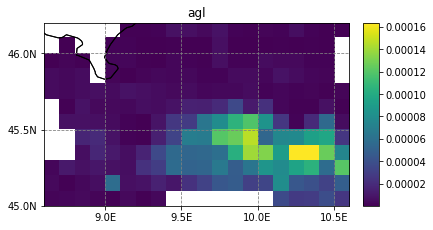

In [93]:
dsr = ds.salem.roi(shape='..\\resources\\Regione_10000_CT10_polygon\\Regione_10000_CT10_polygon.shp')

dsr.agl.mean(dim='time').salem.quick_map()

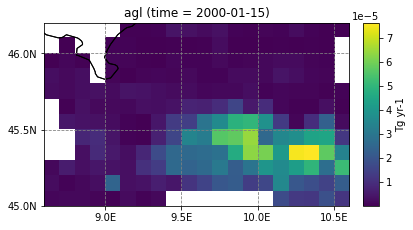

In [92]:
dsr.agl.isel(time=0).salem.quick_map()